## __Leah Gerke__
### _Preliminary Draft_
### _12/04/2024_

Goodreads data used in this notebook is available at: https://github.com/zygmuntz/goodbooks-10k

In [6]:
import pandas as pd
import json

## Data in Hand

__Project Proposal:__
- I am an avid reader and I wanted to choose a project idea that interested me so I would stay motivated and compelled to find the data for my Final Project.
- My project proposal is finding out how the genre of a book effects the amount of reviews a book genre has. I want to see if some genres have more reviews and if those reviews are considered "good" or 'bad". Does historical fiction have more positive reviews than mystery? This will give me insight on which genres are most popular (most reviewed) and also if popularity really proves that a genre is "good". I will need to define "good" and "bad" reviews, determine which genres I will be looking at, and find the number of reviews on a specific genre. I think I am going to try to either choose to focus on five specific genres or group similar genres together into five categories. 

After reviewing the feedback for my project proposal, I decided to steer away from the Goodreads API dataset I originally wanted to use. I instead thought I would use the suggested dataset: Google Books. However, after researching that, I found that Google Books is not the most consistent when it comes to categorizing books into genres nor including reviews on books. I considered using Amazon, but after realizing there are extra steps involved in retrieving the data, and the data may not be accurate anyway, I went back to Goodreads. However, I did find a different dataset that I did not see before that looks promising in how it contains both genre and reviews. But if this does not provide enough data, I think I will have no other choice than to combine and cross reference a different dataset to work with this Goodreads data.

I downloaded this data directly from Github. I clicked on the green code button and it downloaded a zip file. I then extracted the folder into my Data_Emat_fa24 folder so I could have access to all the contents in an organized folder.

Here are the csv contents of the file: 

___books.csv___

___ratings.csv___

___tags.csv___

___book_tags.csv___

___to_read.csv___

I then wanted to disect what each of these contains and see how they might help me with my proposal. I then used pandas and defined all of them as a dataset so I could visualize what they are. I then explained how I might use it for my project.

In [7]:
books_df = pd.read_csv(r"C:\Users\lgerk\data-emat_fa24\goodbooks-10k-master\books.csv")
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


___books.csv shows general information and data about a book. I will use this as a broader way to organize and categorize the books.___

In [8]:
ratings_df = pd.read_csv(r"C:\Users\lgerk\data-emat_fa24\goodbooks-10k-master\ratings.csv")
ratings_df.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


___ratings.csv shows the specific review of a book and it's ID. I can use both of these to help identify which books got higher ratings (stars).___

In [9]:
tags_df = pd.read_csv(r"C:\Users\lgerk\data-emat_fa24\goodbooks-10k-master\tags.csv")
tags_df.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


___tags.csv shows the tags. I might be able to use this when I delve into the genres of books since tags are used to recognize books as a specific category.___ 

In [10]:
book_tags_df = pd.read_csv(r"C:\Users\lgerk\data-emat_fa24\goodbooks-10k-master\book_tags.csv")
book_tags_df.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


___book_tags.csv shows the tag and how many times the book has been given that specific tag. This will help me decide genre to identify a book with.___

In [11]:
to_read_df = pd.read_csv(r"C:\Users\lgerk\data-emat_fa24\goodbooks-10k-master\to_read.csv")
to_read_df.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


___to_read.csv shows which users have marked a specific book on their "to read" lists. Meaning they have not read them and therefore have not left reviews for them. I do not think I will be using this dataframe at all for my project.___

After referencing ChatGPT to understand what tools I might need to help me visualize this data, it gave me the following suggestions on what I could use:
pandas, matplotlib, and seaborn. 

So I will be utilizing what I know first to help me clean, tidy, and represent the data in a well and organized way.


## Analysis Plan

__Project Proposal:__
- My project proposal is finding out how the genre of a book effects the amount of reviews a book genre has. I want to see if some genres have more reviews and if those reviews are considered "good" or 'bad". Does historical fiction have more positive reviews than mystery? This will give me insight on which genres are most popular (most reviewed) and also if popularity really proves that a genre is "good". I will need to define "good" and "bad" reviews, determine which genres I will be looking at, and find the number of reviews on a specific genre. I think I am going to try to either choose to focus on five specific genres or group similar genres together into five categories. 

__My Goodreads hypothesis:__
- The genre of a book correlates with the amount of good and bad reviews it has. 

- Theoretical: The popularity of a book genre proves a genre is "good" or has positive reviews.
- Statistical: Specific genres will recieve a large number of reviews that are mostly positive and that will prove that a genre is "good" and "popular". While other genres will recieve less reviews in general and of those reviews, they will be mostly negative which will prove that a genre is "bad" and "unpopular".

__The data that is most suitable for my hypothesis:__
- After reviewing the feedback left on my Data in Hand checkpoint, my main focus will be using the books_df the most since it has an abundance of information that connects to my specific hypthosis/proposal. I was told to not get distracted by the ratings and to read data sets. This has solidified my choosing to focus on organizing the average ratings, ratings_count, author and title in the books_df, and figuring out a way to categorize them into genres. I will also most likely need to merge the data from the book_tags and tags data set to categorize a book's ID to a genre.

__Reliable vs. Unreliable:__
- This data will be reliable in the fact that it will be able to collect the actual ratings and reviews left by people and present them in an organized way. It can showcase which books have higher/more and lower/less reviews based on what is on Goodreads. 
- This data may be unreliable in a couple ways: Goodreads is not the only book review platform and therefore even if this data reads that one genre is good, another platform could determine that the same genre is actually bad; since reviews are and can be left by anyone, there is a possibility that people purposly left good or bad reviews on a book to support a specific author; and finally, people all have differing opinions, just because the reviews of a genre/book are good, it doesn't mean an individual will actually _like_ the genre/book. So this data can't actually guarantee to an individual perosn if they will think a genre is good or bad before they read a book.


__Limitations or caveats to the datasets that might alter my ability to test my hypothesis:__
- The data I find may be limited or nonexistent based on which genres, ratings, and reviews I decide to collect data from.

In [12]:
books_df = pd.read_csv(r"C:\Users\lgerk\data-emat_fa24\goodbooks-10k-master\books.csv")
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [13]:
books_df.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [14]:
book_tags_df.columns

Index(['goodreads_book_id', 'tag_id', 'count'], dtype='object')

In [15]:
tags_df.columns

Index(['tag_id', 'tag_name'], dtype='object')

In [16]:
books_df_sorted = books_df.loc[:, ['goodreads_book_id', 'authors', 'original_title', 'average_rating', 'work_ratings_count','work_text_reviews_count']]
books_df_sorted.head()

,goodreads_book_id,authors,original_title,average_rating,work_ratings_count,work_text_reviews_count
0,2767052,Suzanne Collins,The Hunger Games,4.34,4942365,155254
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4800065,75867
2,41865,Stephenie Meyer,Twilight,3.57,3916824,95009
3,2657,Harper Lee,To Kill a Mockingbird,4.25,3340896,72586
4,4671,F. Scott Fitzgerald,The Great Gatsby,3.89,2773745,51992


___I believe these are the main columns I will be using when interpreting and tidying up my data. I will need to identify what the "goodreads_book_id" actually means, but this is a good start. I can already easily see the average rating of a book, the number of total ratings, and the number of total text reviews. This will all help me in determining which genres have "more" reviews and are more "popular' and which are "good" and "bad".___

___For example, "Twilight" has a lower rating than "To Kill a Mockingbird" (and I am assuming "Twilight" is in the young adult fiction genre while "To Kill a Mockingbird" is a dramatic classic) so when only looking at those two books, and assuming and generalizing the genre of them, I can already confirm that Young Adult Fiction is not as "good" when compared to Dramatic Classics.___

___I would still need to determine what defines a rating as "bad" or "good" to confidently say that Young Adult Fiction is "bad" and Dramatic Classics are "good". And not to mention that "Twilight" is actually more popular in terms of the number of text reviews. And in my hypothesis I am looking at both of those factors and the correlation between them.___

## Preliminary Draft

In [17]:
books_df_ratings = books_df.loc[:, ['goodreads_book_id', 'average_rating', 'work_ratings_count','work_text_reviews_count']]
books_df_ratings.head()

,goodreads_book_id,average_rating,work_ratings_count,work_text_reviews_count
0,2767052,4.34,4942365,155254
1,3,4.44,4800065,75867
2,41865,3.57,3916824,95009
3,2657,4.25,3340896,72586
4,4671,3.89,2773745,51992


___I wanted the books_df_sorted without the author or title because I know later on that I will not be looking at individual books so I wanted a dataframe with only the essential information so I wouldn't have to deal with it later.___

In [18]:
tag_genre = book_tags_df.groupby('tag_id')['count'].sum().reset_index()
tag_genre = tag_genre.merge(tags_df, on='tag_id')

tag_genre.sort_values('count', ascending=False).head(50)

,tag_id,count,tag_name
30574,30574,140718761,to-read
8717,8717,7507958,currently-reading
11557,11557,4503173,favorites
11743,11743,3688819,fiction
11305,11305,3548157,fantasy
33114,33114,1848306,young-adult
7457,7457,1756920,classics
5207,5207,1317235,books-i-own
26138,26138,1231926,romance
22743,22743,1224279,owned


___I had to merge the book_tags_df with the tags_df to display a variety of different tag_name's (genres) so I could select which genres I wanted to include in my data.___

In [19]:
merged_ids = pd.merge(book_tags_df, tags_df,how = 'inner', on = 'tag_id')
chosen_name = ['classic','non-fiction', 'thriller', 'mystery', 'fiction', 'fantasy', 'adventure','young-adult']
sorted_name = merged_ids[merged_ids['tag_name'].isin(chosen_name)]
sorted_name.head(10)

,goodreads_book_id,tag_id,count,tag_name
1,1,11305,37174,fantasy
4,1,33114,12716,young-adult
5,1,11743,9954,fiction
16,1,1691,1742,adventure
52,1,20939,465,mystery
102,2,11305,3441,fantasy
108,2,11743,972,fiction
109,2,33114,865,young-adult
132,2,20939,447,mystery
168,2,7404,242,classic


In [20]:
group_books = sorted_name.groupby(['goodreads_book_id', 'tag_name'])['count'].sum().reset_index()
group_books.head(10)

,goodreads_book_id,tag_name,count
0,1,adventure,1742
1,1,fantasy,37174
2,1,fiction,9954
3,1,mystery,465
4,1,young-adult,12716
5,2,classic,242
6,2,fantasy,3441
7,2,fiction,972
8,2,mystery,447
9,2,young-adult,865


___I isolated the genres and chose 8 different ones that I thought would give me a wide variety. I originally said I would choose 5 different genres, but I think the 8 I have chosen will provide me with a sufficient amount of data.___


In [21]:
book_genres = pd.merge(group_books, books_df_ratings, how = 'inner', on='goodreads_book_id')
book_genres.head()

,goodreads_book_id,tag_name,count,average_rating,work_ratings_count,work_text_reviews_count
0,1,adventure,1742,4.54,1785676,27520
1,1,fantasy,37174,4.54,1785676,27520
2,1,fiction,9954,4.54,1785676,27520
3,1,mystery,465,4.54,1785676,27520
4,1,young-adult,12716,4.54,1785676,27520


___I then merged those 8 genres with the book_df_ratings dataframe to integrate the rating counts___

In [22]:
rating_genres = book_genres.groupby('tag_name', as_index=False).agg({
    'average_rating': 'mean',
    'work_ratings_count': 'sum',
    'work_text_reviews_count': 'sum'
})
rating_genres.head(10)

,tag_name,average_rating,work_ratings_count,work_text_reviews_count
0,adventure,4.054652,247840027,11193091
1,classic,4.030794,194429333,5493257
2,fantasy,4.058410,300935504,13223378
3,fiction,3.998297,566618055,27617236
4,mystery,3.982702,209528621,10748945
5,non-fiction,4.017679,94515091,4726932
6,thriller,3.969167,135323124,6905314
7,young-adult,4.030873,314677691,14548805


___I had gotten all the way to this point until I was unsure with how to organize the data where the ratings would correlate with the genre. So I sought out chatGPT and it recommended to aggregate the relevant columns. I do not think I would have figured this out on my own. But this displays the data I want very well.___

In [23]:
import matplotlib.pyplot as plt

<Axes: xlabel='tag_name'>

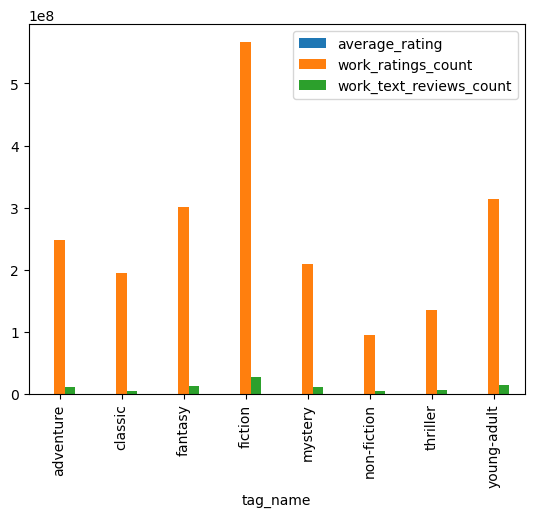

In [24]:
rating_genres.sort_values(by='average_rating', ascending=True)
rating_genres.set_index('tag_name').plot(kind = 'bar')

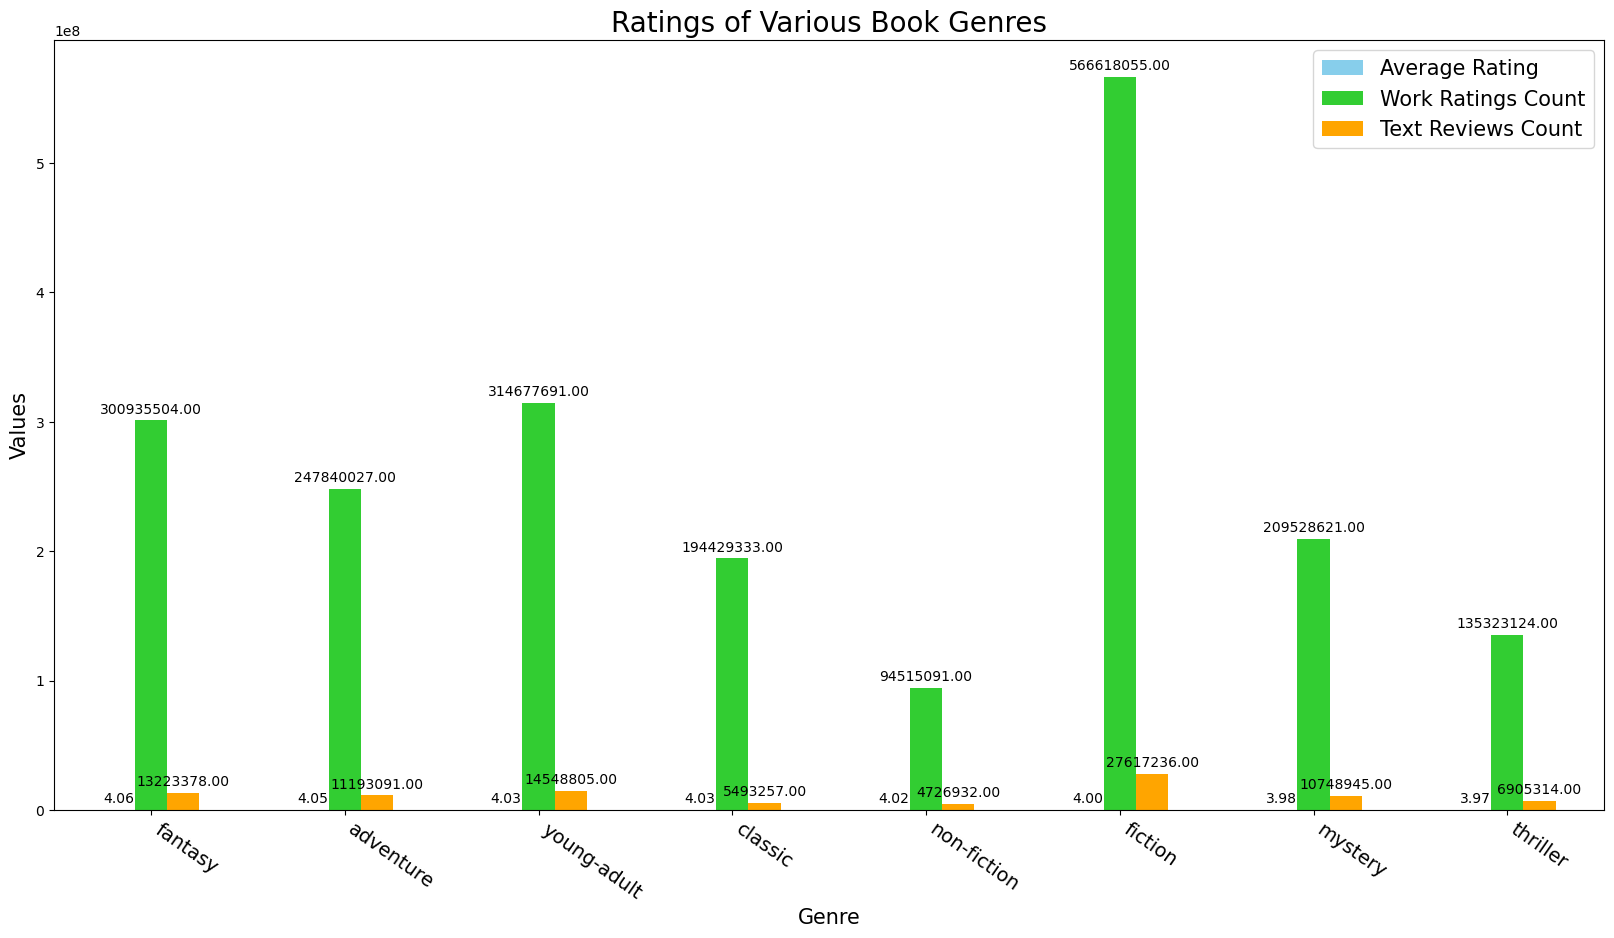

In [26]:
rating_genres_sorted = rating_genres.sort_values(by='average_rating', ascending=False).head(10)
plot_data = rating_genres_sorted[['tag_name', 'average_rating', 'work_ratings_count', 'work_text_reviews_count']]
plot_data.set_index('tag_name', inplace=True)

fig, ax = plt.subplots(figsize=(20, 10))
plot_data.plot(kind='bar', ax=ax, color=['skyblue', 'limegreen', 'orange']
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

ax.set_title('Ratings of Various Book Genres', fontsize=20)
ax.set_xlabel('Genre', fontsize=15)
ax.set_ylabel('Values', fontsize=15)
ax.legend(['Average Rating', 'Work Ratings Count', 'Text Reviews Count'], fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-35, ha='left')
ax.tick_params(axis='x', labelsize=14)

# Show the plot
plt.show()


___This bar chart is somewhat what I want to showcase. I think I want to separate this into three different bar graphs just because the numbers are so drastically different from each other. Especially the "Average Rating", which is arguably the most important element to display, isn't even visable. Additionally, for my final draft, I will want to better represent and define what exactly "Work Ratings Count" and "Text Reviews Count" actually are.___

___ChatGPT helped me write labels for the bars. I wanted to do this on my last project but did not know how, so I was glad I got to integrate into this one.___

### Data Report Conclusion

I am a little dissapointed in the lack of variety of the "Average Rating" numbers. I was going to heavily rely on this to define "good" and "bad" genres. But I think I have to concure that based solely on those numbers, my results were inconclusive in determining "good" and "bad".

However, I do believe based on the Work Ratings Count (the total number of ratings for a genre) and the Text Reviews Count (the total number of text-based reviews for a genre) I can determine which genres are more "popular". This shows that, based off the number of ratings left on it, Fiction is the most popular while "Classic" is least popular. 

Both of these counts, although there is a marginally large gap between them, follow each other's fluxuations pretty accurately.

If I could confidentally compare the "Average Rating" with it, I would be able to determine the second part of my hypthosesis (if popularity correlates with what is considered "good" and "bad") but unfortunately the "Average Rating" was inconclusive.

The overall takeaway is it's easy to tell which genres are popular, but not so easy to determine the quality of a genre based off ratings and reviews.